# 은행 이탈 데이터 셋을 이용한 이진 분류
Binary Classification with a Bank Churn Dataset

---

# 1. 문제 정의(개요)
은행 고객 이탈 예측 관련 데이터셋을 사용해 이진 분류 모델을 구축하는 것을 목적으로 합니다. 이 데이터셋에는 고객ID, 이름, 신용점수, 국가, 성별, 나이, 보유기간, 잔액, 제품 수, 신용카드 상태, 활성 멤버쉽, 예상 급여 및 이 데이터 셋의 메인 학습 라벨인 고객 이탈 여부 등 다양한 특성들이 포함되어 있습니다. 이 프로젝트는 데이터 탐색, 전처리, 모델 선택 및 훈련, 모델 평가, 결과 시각화, 배포의 단계로 진행됩니다. 주어진 데이터를 가지고 모델을 학습시켜 고객의 이탈 예측 및 방지를 목표로 두고 있습니다.

---

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

# 2. 데이터 탐색 및 전처리
- train 데이터 컬럼
    - id: ID
    - CustomerId: 고객ID
    - Surname: 성(이름)
    - CreditScore: 신용점수
    - Geography: 지역(국가)
    - Gender: 성별
    - Age: 나이
    - Tenure: 가입기간
    - Balance: 잔액
    - NumOfProducts: 고객 보유 상품 수
    - HasCrCard: 신용카드 유무 (1: Yes, 0: No)
    - IsActiveMember: 활성 멤버쉽 (1: Yes, 0: No)
    - EstimatedSalary: 예상 급여
    - Exited: 이탈 유무(1: Yes, 0: No) => 타겟 컬럼

In [84]:
# 데이터 불러오기(original, train, test, submission)
original_train = pd.read_csv('./data/Churn_Modelling.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [85]:
original_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [86]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [87]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [88]:
# original_train, train 데이터 합치기
train = pd.concat([train.drop(['id', 'Surname'], axis=1), original_train.drop(['RowNumber', 'Surname'], axis=1)], ignore_index=True)
test.drop(['id', 'Surname'], axis=1, inplace=True)

In [89]:
train.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [90]:
test.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [91]:
# train 데이터 null값 확인
train.isnull().sum()

CustomerId         0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [92]:
# test 데이터 null값 확인
test.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [93]:
# train 데이터 중복값 제거
train.duplicated().sum()

199

In [94]:
train.drop_duplicates(inplace=True)

In [95]:
train.duplicated().sum()

0

In [96]:
# test 데이터 중복값 제거
test.duplicated().sum()

19

In [97]:
test.drop_duplicates(inplace=True)
test.duplicated().sum()

0

In [98]:
# train / test 데이터 크기 조회
train.shape

(174837, 12)

In [99]:
test.shape

(110004, 11)

In [100]:
# train / test 데이터 크기 및 비율 조회
print(f'Train data : {train.shape}')
print(f'Test data : {test.shape}')

train_data_percentage = np.round(train.shape[0] / (train.shape[0] + test.shape[0]), 4)
print(f'Train data Percentage : {train_data_percentage * 100}%')
print(f'Test data Percentage : {(1- train_data_percentage) * 100}%')

Train data : (174837, 12)
Test data : (110004, 11)
Train data Percentage : 61.38%
Test data Percentage : 38.62%


In [101]:
# train 데이터 통계적 수치 확인
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,174837.0,1.569195e+07,71431.683136,15565701.00,15632882.00,15690169.00,15756655.00,15815690.00
CreditScore,174837.0,6.561134e+02,81.133234,350.00,597.00,659.00,710.00,850.00
Age,174836.0,3.817162e+01,8.968050,18.00,32.00,37.00,42.00,92.00
Tenure,174837.0,5.020413e+00,2.811166,0.00,3.00,5.00,7.00,10.00
Balance,174837.0,5.665976e+04,62982.321453,0.00,0.00,0.00,120727.71,250898.09
NumOfProducts,174837.0,1.553161e+00,0.549226,1.00,1.00,2.00,2.00,4.00
HasCrCard,174836.0,7.512469e-01,0.432292,0.00,1.00,1.00,1.00,1.00
IsActiveMember,174836.0,4.986788e-01,0.500000,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,174837.0,1.118791e+05,50807.586962,11.58,73294.48,116971.05,154767.34,199992.48
Exited,174837.0,2.112082e-01,0.408167,0.00,0.00,0.00,0.00,1.00


In [102]:
# Train 데이터 형식 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174837 entries, 0 to 175034
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       174837 non-null  int64  
 1   CreditScore      174837 non-null  int64  
 2   Geography        174836 non-null  object 
 3   Gender           174837 non-null  object 
 4   Age              174836 non-null  float64
 5   Tenure           174837 non-null  int64  
 6   Balance          174837 non-null  float64
 7   NumOfProducts    174837 non-null  int64  
 8   HasCrCard        174836 non-null  float64
 9   IsActiveMember   174836 non-null  float64
 10  EstimatedSalary  174837 non-null  float64
 11  Exited           174837 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 17.3+ MB


In [103]:
# 문자열 데이터인 Geography와 Gender 상세 개수 확인
train.Geography.value_counts()

Geography
France     99115
Spain      38650
Germany    37071
Name: count, dtype: int64

In [104]:
train.Gender.value_counts()

Gender
Male      98492
Female    76345
Name: count, dtype: int64

---

# 3. EDA 

In [105]:
# 범주형/수치형 컬럼 구분
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

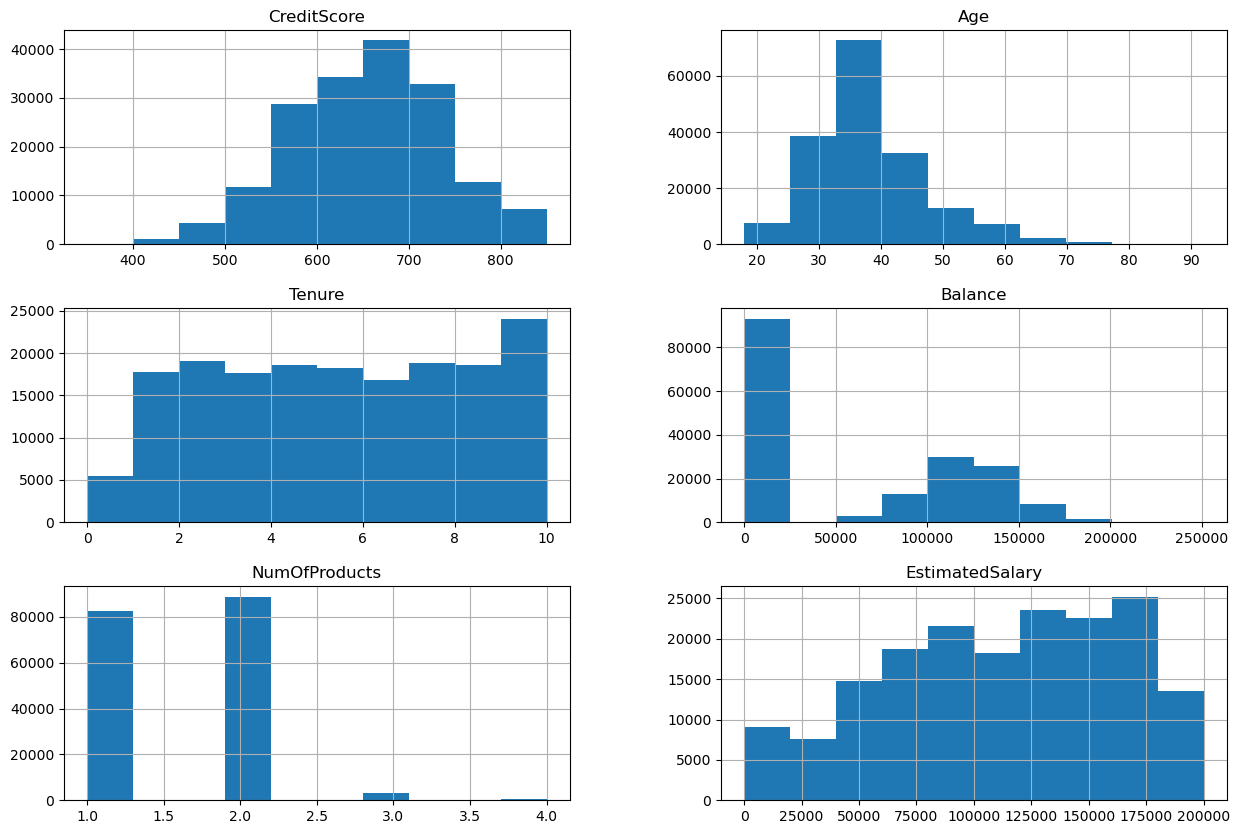

In [106]:
# 수치형 컬럼의 히스토그램 조사
train[num_cols].hist(bins=10, figsize=(15, 10))

### 수치형 컬럼 관찰 결과:
- 신용점수 분포는 600-700점 사이의 고객이 비교적 많습니다.
- 나이 분포는 30-40대에 많이 있습니다.
- 가입 기간으로는 1년 미만 고객의 분포가 가장 적고, 1년 이상 9년 이하 고객의 분포가 대부분이며, 9년이상 고객의 수가 가장 많습니다. 
- 잔액이 25000 미만인 고객이 가장 많습니다.
- 고객 보유 상품 수로는 2개를 가진 고객이 가장 많고, 다음으로는 1개를 가진 고객이 많습니다.
- 예상 급여로는 125000이상 175000미만 고객이 가장 많고, 50000이하인 고객이 비교적 적습니다.

In [141]:
# 수치형 데이터 상관관계 조사
num_cols_corr = train[num_cols].corr()
num_cols_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.008806,0.001139,0.005493,0.011631,-0.000826
Age,-0.008806,1.000000,-0.010710,0.063407,-0.097236,-0.006730
Tenure,0.001139,-0.010710,1.000000,-0.009517,0.007708,0.001508
Balance,0.005493,0.063407,-0.009517,1.000000,-0.357279,0.004393
NumOfProducts,0.011631,-0.097236,0.007708,-0.357279,1.000000,-0.002532
EstimatedSalary,-0.000826,-0.006730,0.001508,0.004393,-0.002532,1.000000


<Axes: >

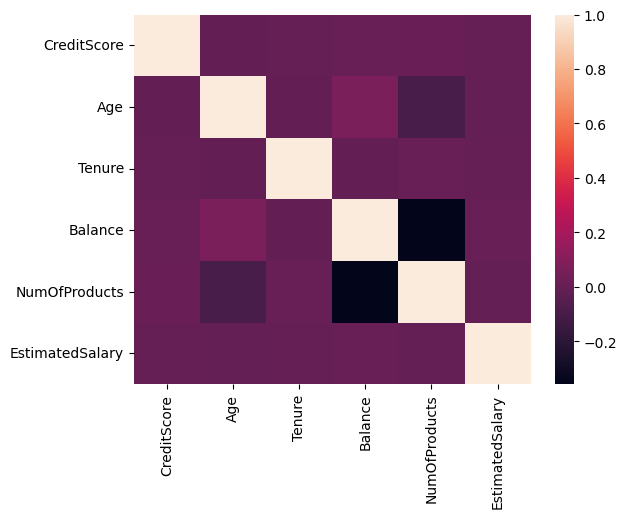

In [142]:
# 수치형 데이터 상관관계 히트맵
sns.heatmap(num_cols_corr)

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

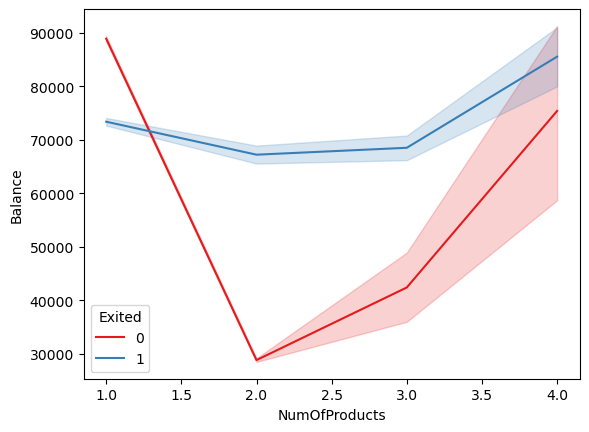

In [149]:
# 상관관계가 높은 두 수치형 데이터 간의 관계 시각화(lineplot)
# balance - 연속형(y축) / num of products - 이산형(x축) 
sns.lineplot(x='NumOfProducts', y='Balance', hue='Exited', data=train, palette='Set1')

### 수치형 데이터 상관관계 관찰 결과:
- 수치형 데이터 중 '고객 보유 상품 수'와 '잔액'이 비교적 높은 음의 상관관계를 가지고 있습니다.
- 상위 2개의 수치형 데이터를 시각화한 결과, 잔액이 60000이상이고, 대체로 상품을 3개 이상 보유한 고객의 이탈이 급격히 높아지는 것을 확인할 수 있습니다.

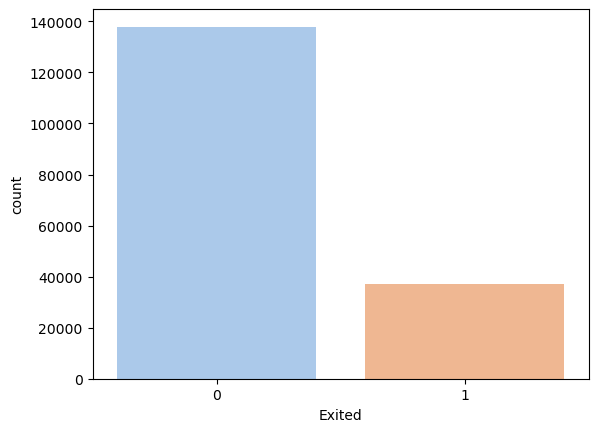

In [107]:
sns.countplot(train, x='Exited', palette='pastel')
plt.show();

##### 이탈하지 않는 고객 수가 이탈 고객 수보다 3배 이상 많습니다.

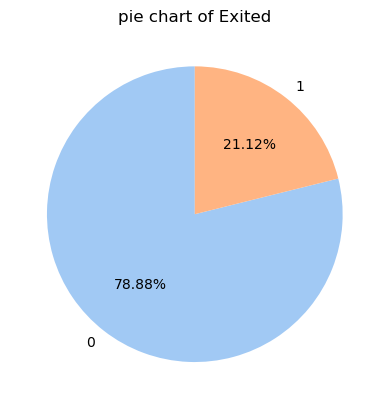

In [108]:
label_counts = train['Exited'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%',  startangle=90, colors=sns.color_palette('pastel'))
plt.title('pie chart of Exited')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18488\2663200301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_18488\2663200301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_18488\2663200301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


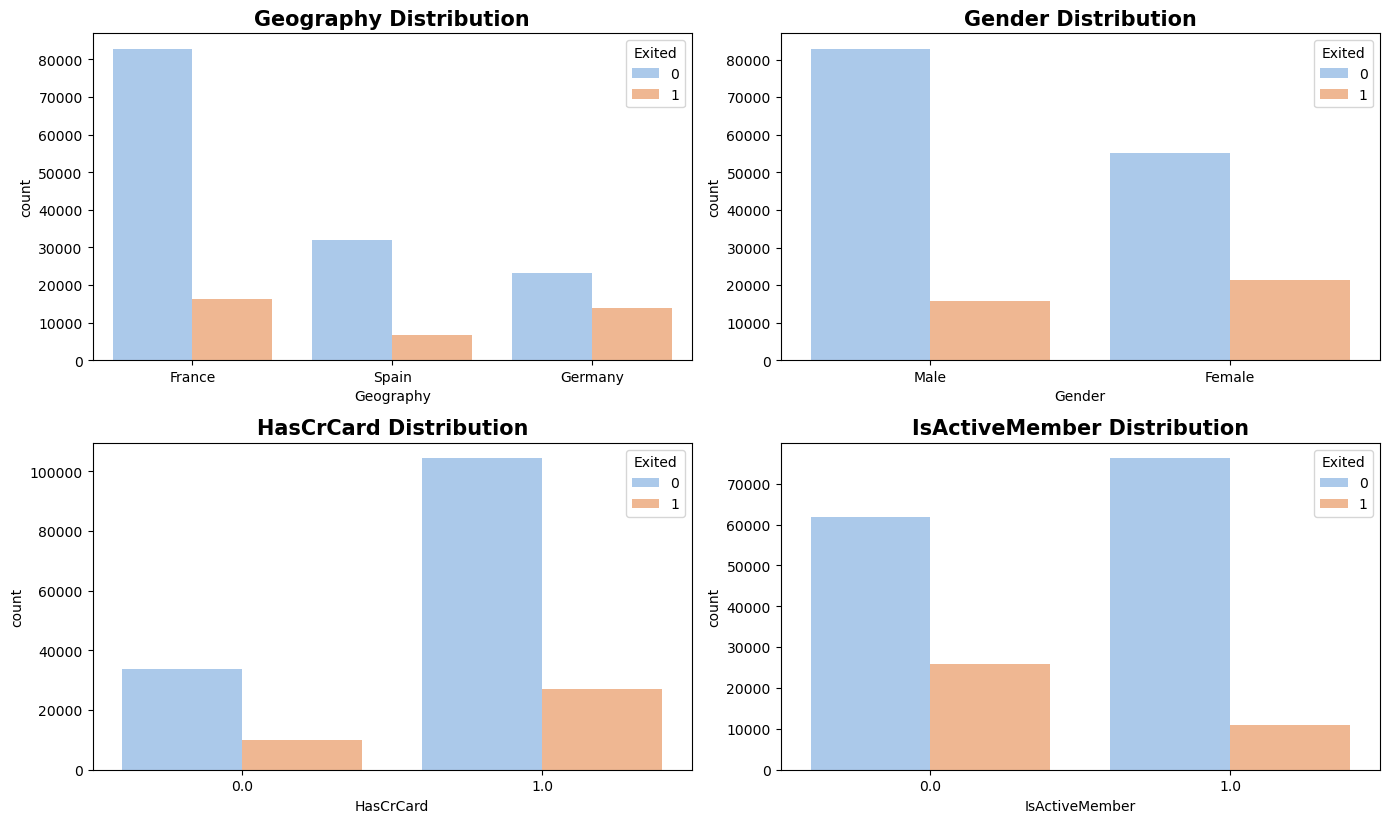

In [109]:
# 이탈 유무에 따른 범주형 컬럼 분포 조사
plt.figure(figsize=(14,len(cat_cols)*3))
for idx,column in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(hue="Exited", x=column, data=train, palette="pastel")
    plt.title(f"{column} Distribution",weight='bold',fontsize=15)
    plt.tight_layout()

### 이탈 유무에 따른 범주형 컬럼 관찰 결과 :
- 지역 분포로 보면, 프랑스와 독일의 이탈 고객 수가 비슷하게 많았고, 스페인의 이탈 고객 수가 가장 적습니다.
- 성별 분포로 보면, 여성이 남성보다 이탈 고객 수가 많습니다.
- 신용카드 유무 분포로 보면, 신용카드를 소지한 고객의 이탈 수가 많으나, 이탈 하지 않는 수도 가장 많습니다.
- 활성 멤버 분포로 보면, 활성 멤버가 아닌 고객의 이탈 수가 많습니다.


,Exited,HasCrCard,count
0,0,1.0,104252
1,0,0.0,33657
2,1,1.0,27093
3,1,0.0,9834


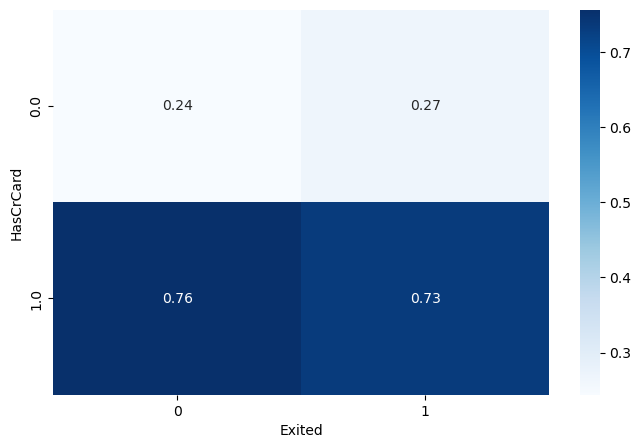

In [128]:
# 신용카드 유무
target_col = 'Exited'

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.despine()

val_cnt = train[[target_col, 'HasCrCard']].value_counts().reset_index()
pivot_table = val_cnt.pivot_table(index='HasCrCard', columns=target_col, values='count', aggfunc=sum, fill_value=0)

pivot_table = pivot_table / pivot_table.sum(axis=0)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Blues")
val_cnt

##### 신용카드를 소지한 고객의 이탈 가능성/이탈 하지 않을 가능성 모두 높은 것으로 나타납니다.

,Exited,IsActiveMember,count
0,0,1.0,76169
1,0,0.0,61740
2,1,0.0,25909
3,1,1.0,11018


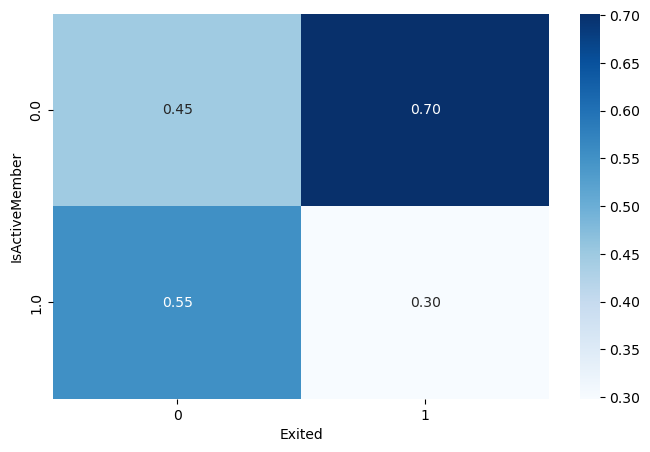

In [134]:
# 활성 멤버쉽 유무
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.despine()
val_cnt = train[[target_col, 'IsActiveMember']].value_counts().reset_index()
pivot_table = val_cnt.pivot_table(index='IsActiveMember', columns=target_col, values='count', aggfunc=sum, fill_value=0)

pivot_table = pivot_table / pivot_table.sum(axis=0)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
val_cnt

##### 활성 멤버가 아닌 고객의 이탈 가능성이 더 높은 것으로 나타납니다.

,Exited,Gender,count
0,0,Male,82792
1,0,Female,55118
2,1,Female,21227
3,1,Male,15700


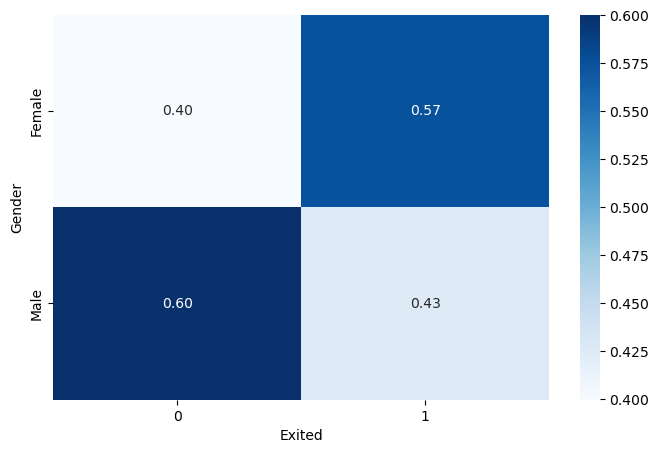

In [135]:
# 성별
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.despine()
val_cnt = train[[target_col, 'Gender']].value_counts().reset_index()
pivot_table = val_cnt.pivot_table(index='Gender', columns=target_col, values='count', aggfunc=sum, fill_value=0)

pivot_table = pivot_table / pivot_table.sum(axis=0)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
val_cnt

##### 여성의 이탈 가능성이 더 높은 것으로 나타납니다.

,Exited,Geography,count
0,0,France,82742
1,0,Spain,32008
2,0,Germany,23159
3,1,France,16373
4,1,Germany,13912
5,1,Spain,6642


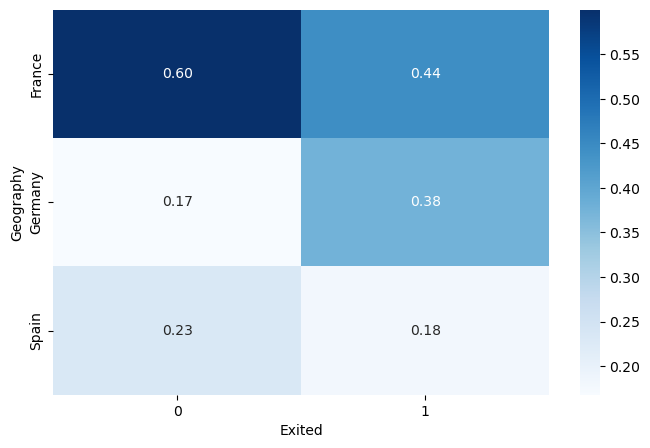

In [136]:
# 지역(국가)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.despine()
val_cnt = train[[target_col, 'Geography']].value_counts().reset_index()
pivot_table = val_cnt.pivot_table(index='Geography', columns=target_col, values='count', aggfunc=sum, fill_value=0)

pivot_table = pivot_table / pivot_table.sum(axis=0)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
val_cnt

##### 프랑스 고객의 이탈 가능성이 가장 높게 나타났으나, 이탈 하지 않을 가능성도 가장 높게 나타납니다.

In [113]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [137]:
# 라벨 인코딩(Label Encoding)

def label_encoder(column):
    le = LabelEncoder().fit(column)
    return le.transform(column)

In [138]:
column = cat_cols

for col in column:
    train[col] = label_encoder(train[col])

In [139]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,0,1,33.0,3,0.00,2,1,0,181449.97,0
1,15749177,627,0,1,33.0,1,0.00,2,1,1,49503.50,0
2,15694510,678,0,1,40.0,10,0.00,2,1,0,184866.69,0
3,15741417,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0
4,15766172,716,2,1,33.0,5,0.00,2,1,1,15068.83,0


<Axes: >

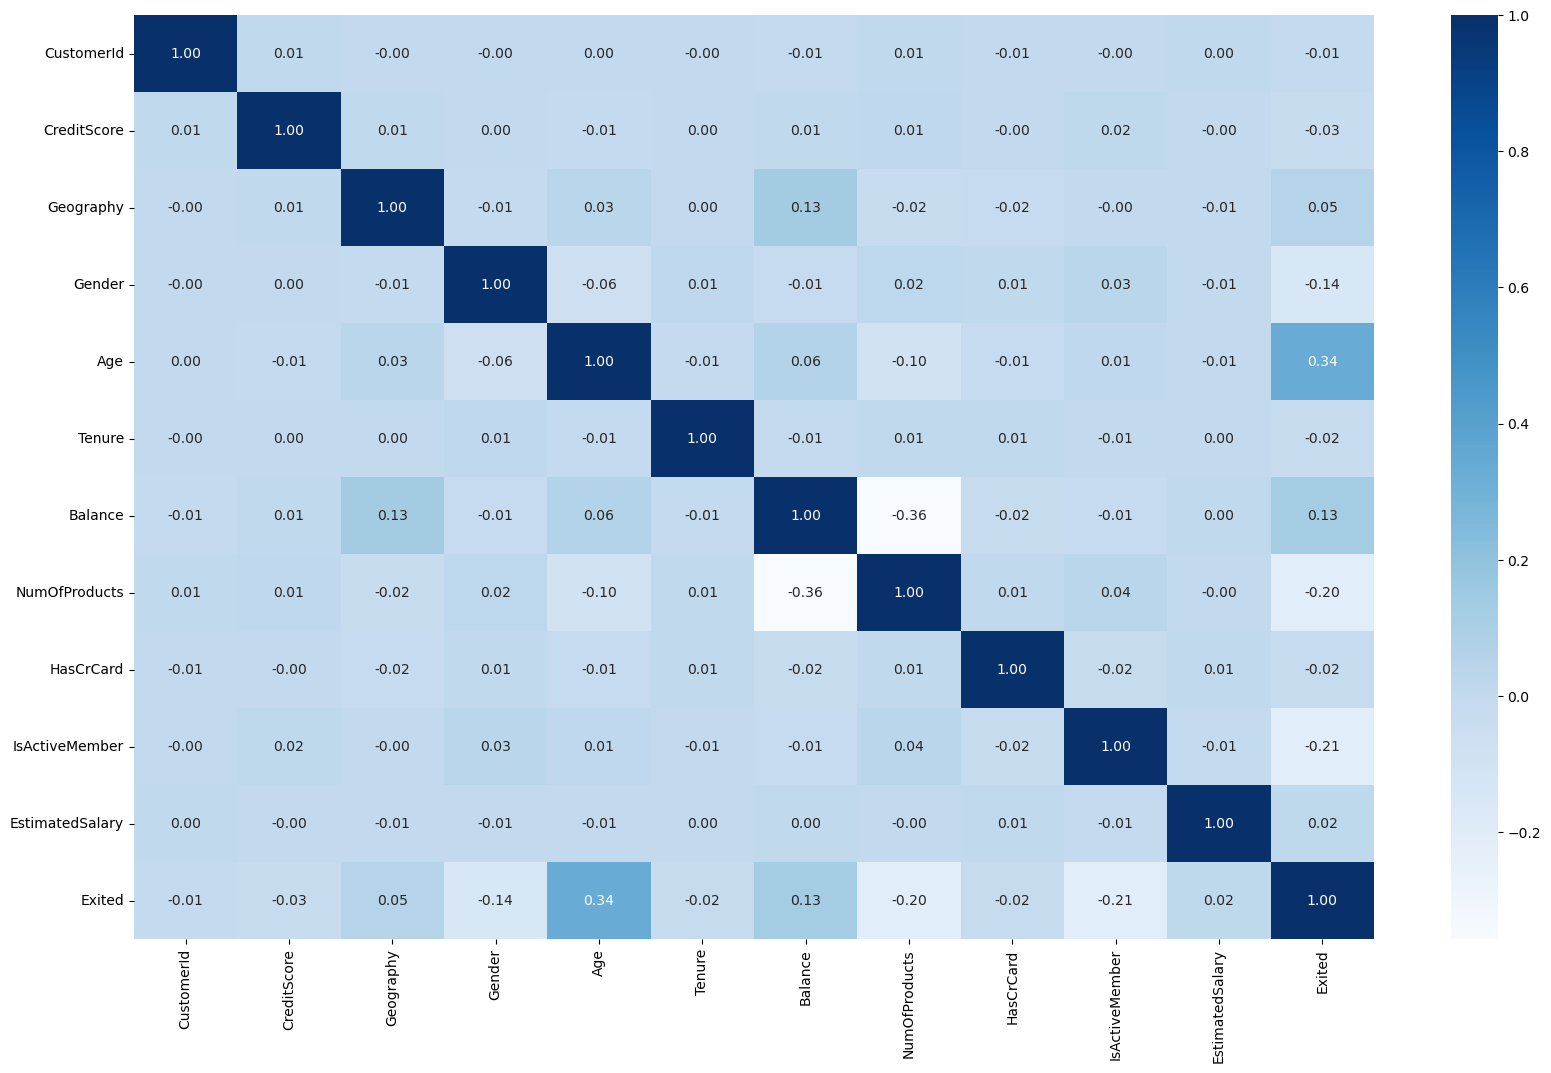

In [140]:
# 상관관계 히트맵
train_corr = train.corr(method='pearson')
plt.figure(figsize=(20, 12))
sns.heatmap(train_corr, annot=True, fmt='.2f', cmap='Blues')

### 상관관계 히트맵 관찰:
- 이탈 유무('Exited')는 나이('Age'), 잔액('Balance')과 상관관계가 있습니다.

---

# EDA 결과 두드러진 특징:
- 지역: 프랑스와 독일의 이탈이 비교적 많음
- 성별: 여성의 이탈이 비교적 많음
- 활성 멤버: 활성 멤버가 아닌 고객의 이탈이 비교적 많음
- 이탈 유무는 나이, 잔액과의 상관관계가 비교적 높음
- 잔액이 6만 이상, 상품을 3개 이상 보유한 고객의 이탈이 비교적 높음


# 결과에 따른 궁금증(관련 기사 찾아보기):
- 왜 프랑스 독일의 이탈이 비교적 많은지?
- 왜 여성의 이탈이 남성보다 많은지?
- 연령대에 따른 고객 이탈
- 은행 잔고에 따른 고객 이탈
- 왜 잔액이 높을수록 고객 이탈이 많은지?

# 고객 이탈과 관계성 있는 feature(데이터 추가 탐색)
- 예적금 금리 변동 자료: 예적금 금리 올려 고객 이탈율 최소화(https://www.thepublic.kr/news/articleView.html?idxno=82082)
- 은행 마케팅 진행비: 은행 마케팅 진행 비용과 고객 이탈율 관계